In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
import numpy as np
import math
from scipy import stats
from matplotlib import pyplot as plt

In [16]:
lambda_truth = 4.0

In [33]:
x_line = np.arange(4 * lambda_truth)
true_model = np.exp(x_line * np.log(lambda_truth) - [math.lgamma(x + 1) for x in x_line] - lambda_truth)
np.round(true_model, 3)

array([0.018, 0.073, 0.147, 0.195, 0.195, 0.156, 0.104, 0.06 , 0.03 ,
       0.013, 0.005, 0.002, 0.001, 0.   , 0.   , 0.   ])

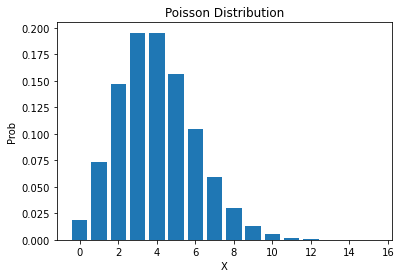

In [34]:
plt.bar(x=x_line, height=true_model)
plt.title("Poisson Distribution")
plt.xlabel("X")
plt.ylabel("Prob")
plt.show()

In [35]:
N = 50
x_n = np.random.poisson(lam=lambda_truth, size=N)
x_n[:10]

array([3, 2, 8, 0, 3, 5, 3, 6, 1, 8])

In [36]:
for x in x_line:
    ans = np.sum(x_n == x)
    print(x, ans)

0.0 1
1.0 5
2.0 7
3.0 10
4.0 11
5.0 5
6.0 5
7.0 3
8.0 3
9.0 0
10.0 0
11.0 0
12.0 0
13.0 0
14.0 0
15.0 0


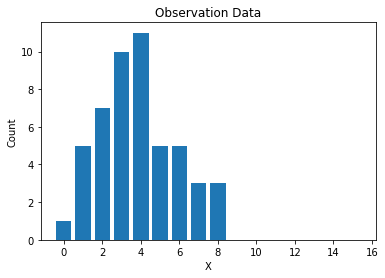

In [37]:
plt.bar(x=x_line, height=[np.sum(x_n == x)for x in x_line])
plt.title("Observation Data")
plt.xlabel("X")
plt.ylabel("Count")
plt.show()

In [38]:
a = 1
b = 1

lambda_line = np.arange(0, 2 * lambda_truth, 0.001)
ln_C_gam = a * np.log(b) - math.lgamma(a)
prior = np.exp(ln_C_gam + (a - 1) * np.log(lambda_line) - b * lambda_line)
np.round(prior, 3)

array([  nan, 0.999, 0.998, ..., 0.   , 0.   , 0.   ])

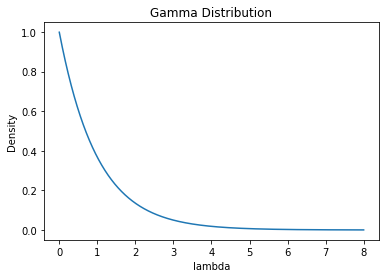

In [39]:
plt.plot(lambda_line, prior)
plt.xlabel("lambda")
plt.ylabel("Density")
plt.title("Gamma Distribution")
plt.show()

In [40]:
a_hat = np.sum(x_n) + a
b_hat = N + b
print(a_hat, b_hat)

194 51


In [41]:
ln_C_gam = a_hat * np.log(b_hat) - math.lgamma(a_hat)
posterior = np.exp(ln_C_gam + (a_hat - 1) * np.log(lambda_line) - b_hat * lambda_line)
np.round(posterior, 5)

array([0., 0., 0., ..., 0., 0., 0.])

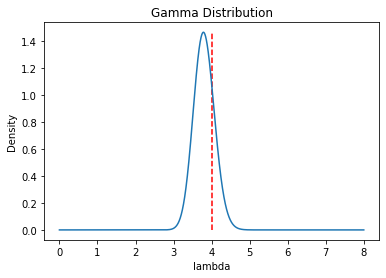

In [46]:
plt.plot(lambda_line, posterior)
plt.vlines(x=lambda_truth, ymin=0, ymax=max(posterior), color='red', linestyle='--')
plt.xlabel("lambda")
plt.ylabel("Density")
plt.title("Gamma Distribution")
plt.show()

In [48]:
r_hat = a_hat
p_hat = 1 / (b_hat + 1)
print(r_hat, p_hat)

194 0.019230769230769232


In [49]:
ln_C_NB = np.array([math.lgamma(x + r_hat) - math.lgamma(x + 1) for x in x_line]) - math.lgamma(r_hat)
predict = np.exp(ln_C_NB + r_hat * np.log(1 - p_hat) + x_line * np.log(p_hat)) 
np.round(predict, 3)

array([0.023, 0.086, 0.162, 0.203, 0.192, 0.147, 0.093, 0.051, 0.025,
       0.011, 0.004, 0.001, 0.   , 0.   , 0.   , 0.   ])

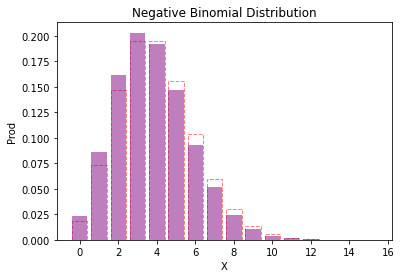

In [50]:
plt.bar(
    x=x_line, 
    height=true_model, 
    label='true', 
    alpha=0.5, 
    color='white', 
    edgecolor='red', 
    linestyle='--',
)
plt.bar(
    x=x_line, 
    height=predict, 
    label='predict', 
    alpha=0.5, 
    color='purple',
)
plt.xlabel("X")
plt.ylabel("Prod")
plt.title("Negative Binomial Distribution")
plt.show()